# Transformer Logits


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import csv
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve

from tqdm import tqdm
from edm.jobs.mlp_job import MlpJob

import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [2]:
rhythm_output = sorted(['270492004', '164889003', '164890007', '426627000', '713427006', 
                  '713426002', '445118002', '39732003', '164909002', '251146004', 
                  '698252002', '10370003', '284470004', '427172004', '164947007', 
                  '111975006', '164917005', '47665007', '427393009',
                  '426177001', '426783006', '427084000', '164934002',
                  '59931005'])

concept_to_desc = {
    "270492004": "First degree atrioventricular block",
    "164889003": "Atrial fibrillation",
    "426627000": "Bradycardia",
    "164890007": "Atrial flutter",
    "713427006": "Complete right bundle branch block",
    "713426002": "Incomplete right bundle branch block",
    "445118002": "Left anterior fascicular block",
    "39732003": "Left axis deviation",
    "164909002": "Left bundle branch block",
    "251146004": "Low QRS voltage",
    "698252002": "Non-specific intraventricular conduction delay",
    "10370003": "Pacing rhythm",
    "284470004": "Premature atrial contraction",
    "427172004": "Premature ventricular contractions",
    "164947007": "Prolonged PR interval",
    "111975006": "Prolonged QT interval",
    "164917005": "Q wave abnormal",
    "47665007": "Right axis deviation",
    "427393009": "Sinus arrhythmia",
    "426177001": "Sinus bradycardia",
    "426783006": "Sinus rhythm",
    "427084000": "Sinus tachycardia",
    "164934002": "T wave abnormal",
    "59931005": "T wave inversion",
    "59118001": "Right bundle branch block (disorder)",
    "63593006": "Supraventricular premature beats",
    "17338001": "Ventricular premature beats"
}

for i in range(24):
    rhythm_output[i] = concept_to_desc[rhythm_output[i]]

for i in range(24):
    print(rhythm_output[i])

Pacing rhythm
Prolonged QT interval
Atrial fibrillation
Atrial flutter
Left bundle branch block
Q wave abnormal
T wave abnormal
Prolonged PR interval
Low QRS voltage
First degree atrioventricular block
Premature atrial contraction
Left axis deviation
Sinus bradycardia
Bradycardia
Sinus rhythm
Sinus tachycardia
Premature ventricular contractions
Sinus arrhythmia
Left anterior fascicular block
Right axis deviation
T wave inversion
Non-specific intraventricular conduction delay
Incomplete right bundle branch block
Complete right bundle branch block


In [3]:
%load_ext autoreload
%autoreload 2

### MLP Training - 1WPP

Read df_train with shape = (8162, 79), pos = (757, 79), neg = (7405, 79)
Read df_val with shape = (1356, 79), pos = (150, 79), neg = (1206, 79)
Read df_test with shape = (1356, 79), pos = (150, 79), neg = (1206, 79)


8162it [00:01, 5300.90it/s]


Produced embedding for df_train_x with shape = (8162, 26)


1356it [00:00, 5679.72it/s]


Produced embedding for df_val_x with shape = (1356, 26)


1356it [00:00, 5186.69it/s]
Global seed set to 1234
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Produced embedding for df_test_x with shape = (1356, 26)
Starting model training...



  | Name  | Type              | Params
--------------------------------------------
0 | loss  | BCEWithLogitsLoss | 0     
1 | model | MLP               | 19.8 K
--------------------------------------------
19.8 K    Trainable params
0         Non-trainable params
19.8 K    Total params
0.079     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1234


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/deep/u/tomjin/miniconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


------------------------------------


============= TRAIN ROC CURVE ===============


Testing: 0it [00:00, ?it/s]

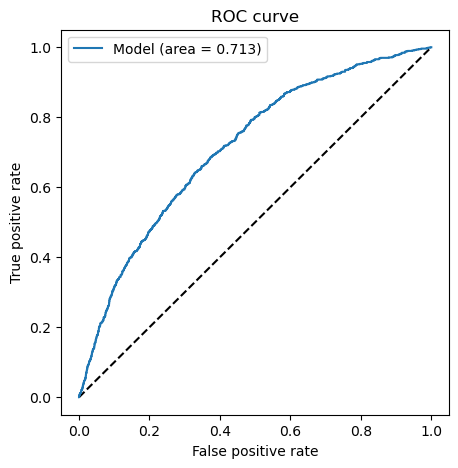

/deep/u/tomjin/miniconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[DeLong] AUC=0.713, AUC COV=0.0, 95% CI=[0.694, 0.731]; AUPRC=0.192, 95% CI=N/A
TRAIN AUROC = (0.7125820052679603, 0.1919356524129055) AUPRC = 0.1919356524129055 using data size 8162 with 757 ACS
Best Checkpoint = 


============= VAL ROC CURVE ===============


Testing: 0it [00:00, ?it/s]

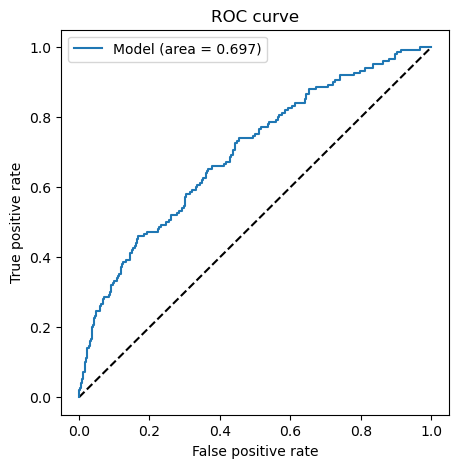

/deep/u/tomjin/miniconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[DeLong] AUC=0.697, AUC COV=0.001, 95% CI=[0.651, 0.742]; AUPRC=0.259, 95% CI=N/A
VAL AUROC = (0.6965726920950801, 0.25921064247734665) AUPRC = 0.25921064247734665 using data size 1356 with 150 pos


============= TEST ROC CURVE ===============


Testing: 0it [00:00, ?it/s]

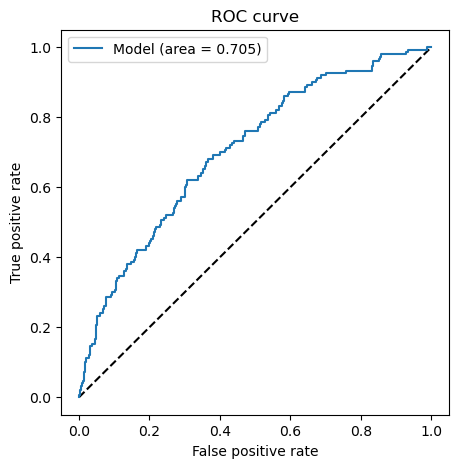

  0%|          | 4/10000 [00:00<05:21, 31.07it/s]

[DeLong] AUC=0.705, AUC COV=0.0, 95% CI=[0.662, 0.749]; AUPRC=0.238, 95% CI=N/A


100%|██████████| 10000/10000 [05:27<00:00, 30.52it/s]


[Bootstrap] AUC=0.705, 95% CI=[0.659, 0.748]; AUPRC=0.238, 95% CI=[0.184, 0.304]
TEST AUROC = (0.7052072968490878, 0.23834197179134395) AUPRC = 0.23834197179134395 using data size 1356 with 150 pos


============= TRAIN/VAL LOSS CURVE ===============


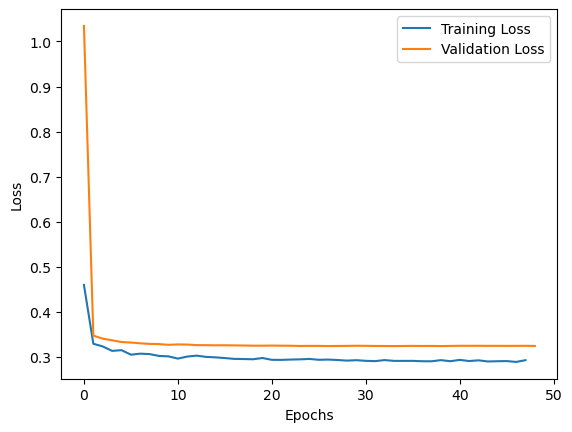

In [4]:
mlp = MlpJob(
    df_train_path="/deep/group/ed-monitor/patient_data_v9/consolidated.filtered.train.txt",
    df_val_path="/deep/group/ed-monitor/patient_data_v9/consolidated.filtered.val.txt",
    df_test_path="/deep/group/ed-monitor/patient_data_v9/consolidated.filtered.test.txt",
    summary_path="/deep/group/ed-monitor/patient_data_v9/waveforms/15sec-500hz-1norm-1wpp/II/transformer-64-logits/embeddings_summary.csv",
    embeddings_path="/deep/group/ed-monitor/patient_data_v9/waveforms/15sec-500hz-1norm-1wpp/II/transformer-64-logits/embeddings.dat.npy",
    save_predictions_path="/deep/group/ed-monitor/patient_data_v9/predictions/15sec-500hz-1norm-1wpp/II/final-transformer-64-logits/waveform-only",
    verbose=1
)

auroc_train, auroc_val, auroc_test = mlp.run(batch_size=128, 
                                             learning_rate=0.0001, 
                                             dropout_rate=0.3, 
                                             num_inner_layers=3, 
                                             epochs=100, 
                                             inner_dim=128,
                                             patience=10)

### MLP Training - 10 WPP

Read df_train with shape = (8162, 79), pos = (757, 79), neg = (7405, 79)
Read df_val with shape = (1356, 79), pos = (150, 79), neg = (1206, 79)
Read df_test with shape = (1356, 79), pos = (150, 79), neg = (1206, 79)


8162it [00:01, 5442.28it/s]


Produced embedding for df_train_x with shape = (8162, 26)


1356it [00:00, 5654.69it/s]


Produced embedding for df_val_x with shape = (1356, 26)


1356it [00:00, 5690.48it/s]
Global seed set to 1234
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Produced embedding for df_test_x with shape = (1356, 26)
Starting model training...



  | Name  | Type              | Params
--------------------------------------------
0 | loss  | BCEWithLogitsLoss | 0     
1 | model | MLP               | 19.8 K
--------------------------------------------
19.8 K    Trainable params
0         Non-trainable params
19.8 K    Total params
0.079     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1234


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/deep/u/tomjin/miniconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


------------------------------------


============= TRAIN ROC CURVE ===============


Testing: 0it [00:00, ?it/s]

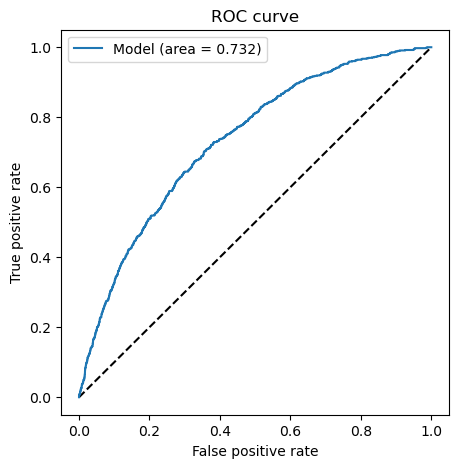

/deep/u/tomjin/miniconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[DeLong] AUC=0.732, AUC COV=0.0, 95% CI=[0.714, 0.75]; AUPRC=0.215, 95% CI=N/A
TRAIN AUROC = (0.7321075320417048, 0.21450796389169402) AUPRC = 0.21450796389169402 using data size 8162 with 757 ACS
Best Checkpoint = 


============= VAL ROC CURVE ===============


Testing: 0it [00:00, ?it/s]

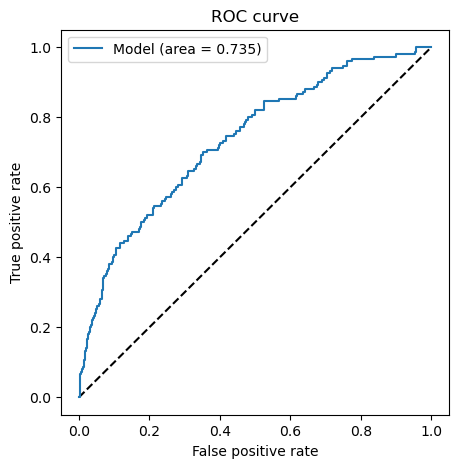

/deep/u/tomjin/miniconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[DeLong] AUC=0.735, AUC COV=0.0, 95% CI=[0.692, 0.778]; AUPRC=0.29, 95% CI=N/A
VAL AUROC = (0.7352902155887232, 0.29004548275398817) AUPRC = 0.29004548275398817 using data size 1356 with 150 pos


============= TEST ROC CURVE ===============


Testing: 0it [00:00, ?it/s]

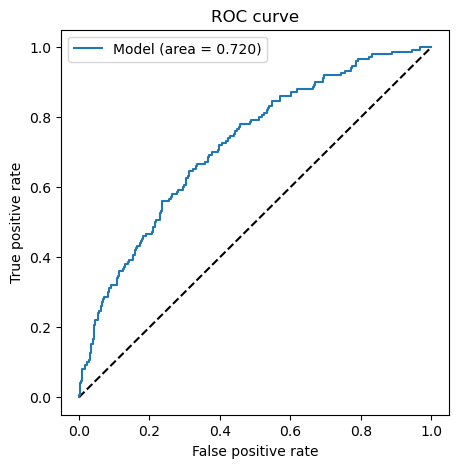

  0%|          | 4/10000 [00:00<05:23, 30.93it/s]

[DeLong] AUC=0.72, AUC COV=0.0, 95% CI=[0.678, 0.762]; AUPRC=0.258, 95% CI=N/A


100%|██████████| 10000/10000 [05:29<00:00, 30.36it/s]


[Bootstrap] AUC=0.72, 95% CI=[0.676, 0.762]; AUPRC=0.258, 95% CI=[0.198, 0.331]
TEST AUROC = (0.7199391929242676, 0.2578440830205904) AUPRC = 0.2578440830205904 using data size 1356 with 150 pos


============= TRAIN/VAL LOSS CURVE ===============


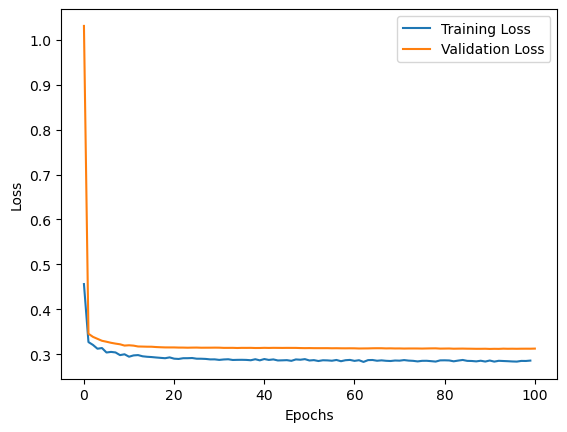

In [5]:
mlp = MlpJob(
    df_train_path="/deep/group/ed-monitor/patient_data_v9/consolidated.filtered.train.txt",
    df_val_path="/deep/group/ed-monitor/patient_data_v9/consolidated.filtered.val.txt",
    df_test_path="/deep/group/ed-monitor/patient_data_v9/consolidated.filtered.test.txt",
    summary_path="/deep/group/ed-monitor/patient_data_v9/waveforms/15sec-500hz-1norm-10wpp/II/transformer-64-logits/embeddings_summary.csv",
    embeddings_path="/deep/group/ed-monitor/patient_data_v9/waveforms/15sec-500hz-1norm-10wpp/II/transformer-64-logits/embeddings.dat.npy",
    save_predictions_path="/deep/group/ed-monitor/patient_data_v9/predictions/15sec-500hz-1norm-10wpp/II/final-transformer-64-logits/waveform-only",
    verbose=1
)

auroc_train, auroc_val, auroc_test = mlp.run(batch_size=128, 
                                             learning_rate=0.0001, 
                                             dropout_rate=0.3, 
                                             num_inner_layers=3, 
                                             epochs=100, 
                                             inner_dim=128,
                                             patience=10)